In [1]:
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('spotify_encoded.csv')
spotify.head()

,track_id,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,5SuOikwiRyPMVoIQDJUgSV,73,-0.004759,-0.309921,0.648283,-0.678397,-1.205833,0.350223,-1.306583,0.448128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4qPNDBW1i3p13qLCt0Ki3A,55,-0.692843,-0.309921,-0.781882,-1.818618,-1.205833,-1.616854,0.765355,-0.117369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1iJBSr7s7jYXzM8EGcbK5b,57,-0.173180,-0.309921,-0.681324,-1.072643,-1.486792,-0.210138,0.765355,-0.292021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6lfxq3CG4xtTiEg7opyCyx,71,-0.248673,-0.309921,-1.642216,-2.229870,-1.486792,-1.856901,0.765355,-0.456498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5vjLSffimiIP26QG5WcN2K,82,-0.274819,-0.309921,0.324261,-0.747970,-0.924873,-0.200198,0.765355,-0.318303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
genre_columns = [col for col in spotify.columns if 'track_genre' in col]
genres = spotify[genre_columns]
genres['popularity'] = spotify['popularity']

spotify = spotify.drop(genre_columns, axis=1)

/var/folders/37/6l880pbs70bgr73m4qbsq0080000gn/T/ipykernel_32622/1016535376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres['popularity'] = spotify['popularity']


In [4]:
spotify.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,79022.000000,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04,7.902200e+04
mean,34.720053,-6.042428e-17,1.870275e-17,-6.114361e-16,1.028651e-16,2.445745e-17,-4.783589e-16,5.466958e-17,-1.352353e-16,-2.086076e-16,9.782978e-17,-1.179712e-16,-3.165081e-17,-3.495976e-16,-6.474030e-18
std,19.484832,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,0.000000,-1.889996e+00,-3.099212e-01,-3.128246e+00,-2.460233e+00,-1.486792e+00,-7.673553e+00,-1.306583e+00,-7.642572e-01,-9.630820e-01,-5.656452e-01,-1.104767e+00,-1.751738e+00,-4.050512e+00,-8.493538e+00
25%,21.000000,-4.926066e-01,-3.099212e-01,-6.366309e-01,-6.861277e-01,-9.248734e-01,-3.461021e-01,-1.306583e+00,-4.564980e-01,-9.185666e-01,-5.656452e-01,-6.116849e-01,-8.442014e-01,-7.566801e-01,2.254443e-01
50%,35.000000,-1.436853e-01,-3.099212e-01,7.845158e-02,1.680711e-01,-8.199590e-02,2.538291e-01,7.653549e-01,-3.428899e-01,-4.185956e-01,-5.653314e-01,-4.383045e-01,-5.388826e-02,-2.046047e-03,2.254443e-01
75%,49.000000,3.046932e-01,-3.099212e-01,7.376683e-01,8.522032e-01,7.608816e-01,6.500951e-01,7.653549e-01,-1.308726e-02,8.793423e-01,-2.473520e-02,3.183559e-01,8.082716e-01,5.983000e-01,2.254443e-01
max,100.000000,4.249653e+01,3.226627e+00,2.374537e+00,1.404920e+00,1.603759e+00,2.465267e+00,7.653549e-01,7.417221e+00,1.968315e+00,2.422808e+00,3.906229e+00,2.010758e+00,4.024621e+00,2.405190e+00


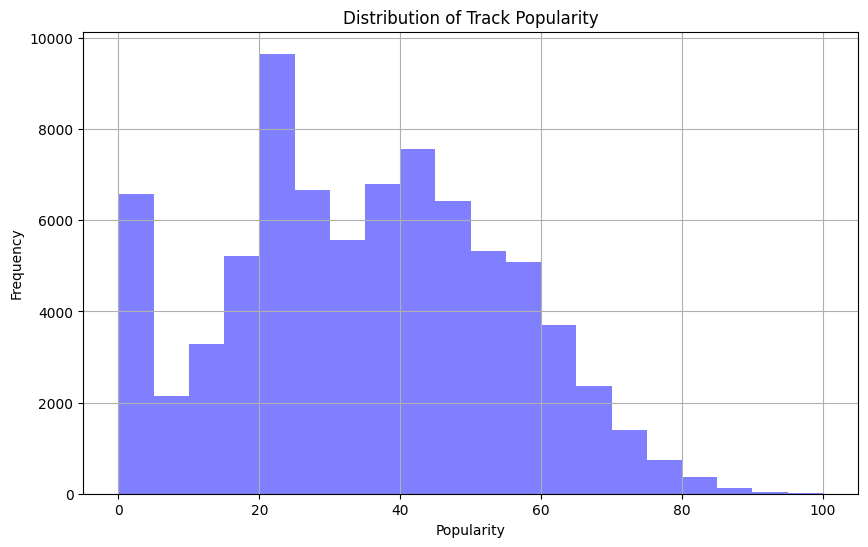

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(spotify['popularity'], bins=20, facecolor='blue', alpha=0.5)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
numeric_spotify = spotify.select_dtypes(include=['int64', 'float64'])

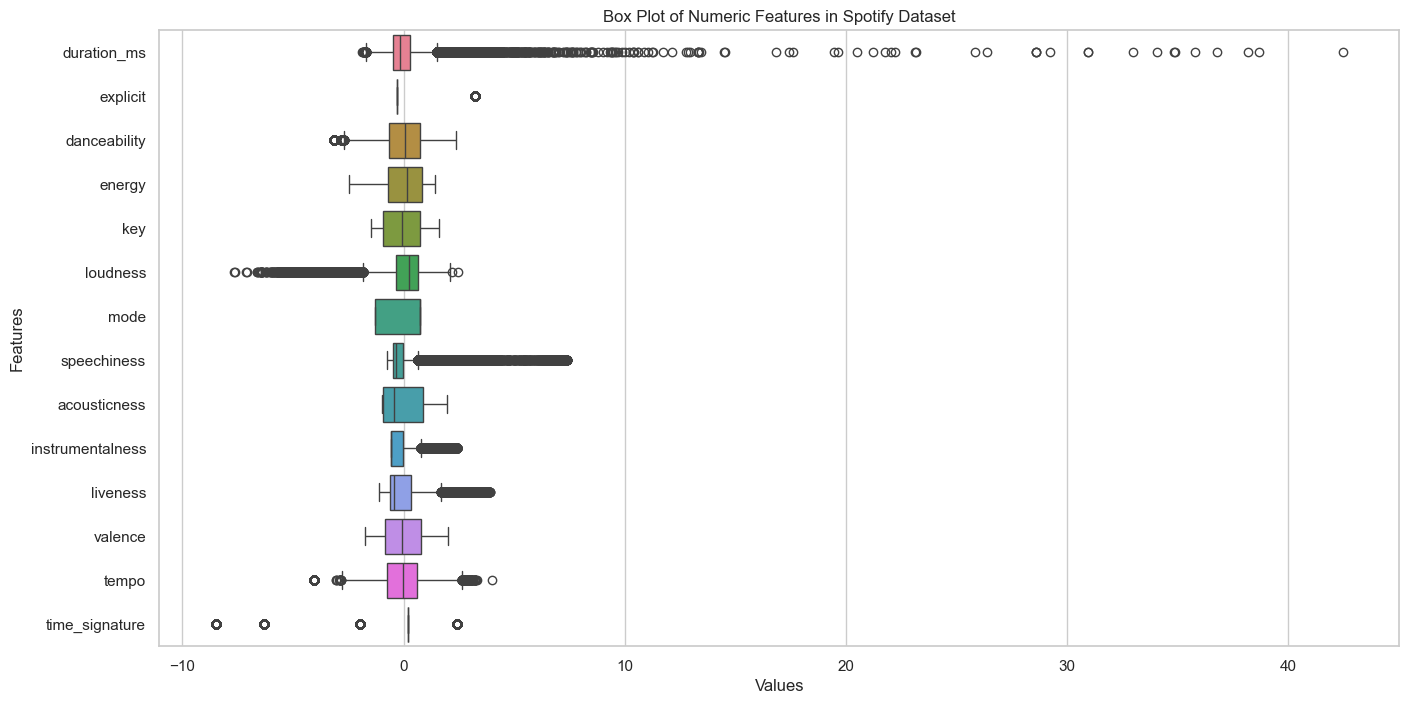

In [7]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

sns.boxplot(data=numeric_spotify.drop('popularity', axis=1), orient="h")

plt.title("Box Plot of Numeric Features in Spotify Dataset")
plt.xlabel("Values")
plt.ylabel("Features")

plt.show()

In [8]:
correlation_matrix = numeric_spotify.corr()

popularity_correlations = correlation_matrix['popularity'].sort_values()

print("Correlation of Popularity with Features:")
print(popularity_correlations.drop('popularity'))

Correlation of Popularity with Features:
instrumentalness   -0.178868
speechiness        -0.066147
duration_ms        -0.056037
liveness           -0.028150
acousticness       -0.025881
mode               -0.010266
energy             -0.005719
tempo              -0.001363
key                 0.004471
valence             0.012660
time_signature      0.035238
explicit            0.062488
danceability        0.084627
loudness            0.086941
Name: popularity, dtype: float64


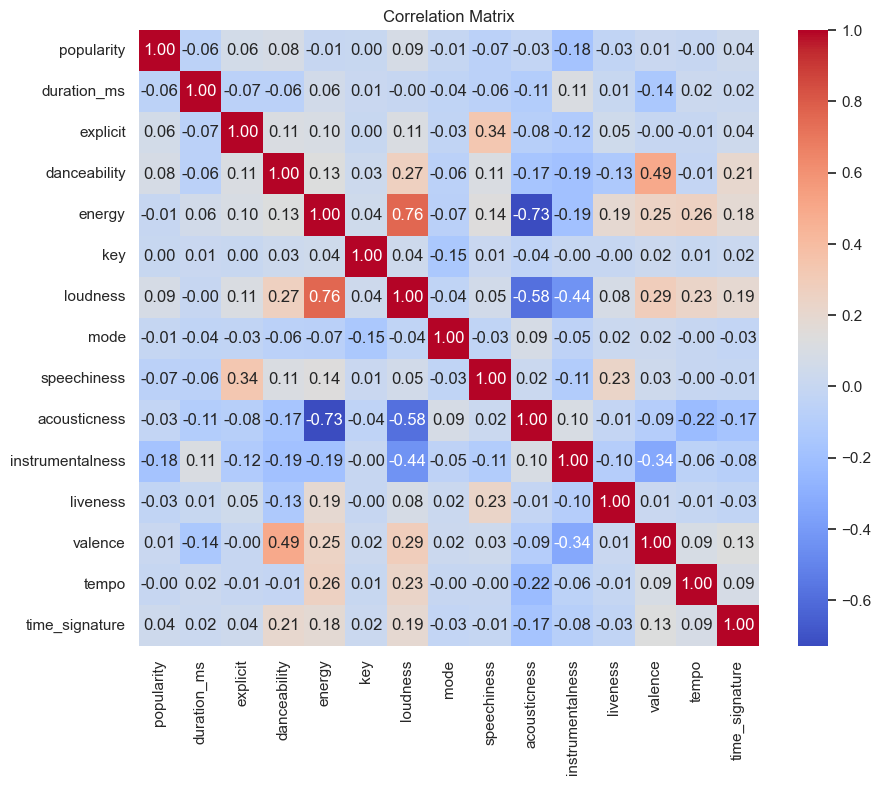

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [10]:
genre_correlations = genres.corr()

print("Correlation of Popularity with Genres:")
print(genre_correlations['popularity'].sort_values().drop('popularity'))

Correlation of Popularity with Genres:
track_genre_iranian          -0.184544
track_genre_romance          -0.132038
track_genre_detroit-techno   -0.131283
track_genre_chicago-house    -0.127653
track_genre_grindcore        -0.115056
                                ...   
track_genre_grunge            0.079271
track_genre_hip-hop           0.083798
track_genre_chill             0.113144
track_genre_pop-film          0.127293
track_genre_k-pop             0.132068
Name: popularity, Length: 113, dtype: float64
